In [1]:
from file_manager import load_system
import wave_function_constructor as wfc
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import numpy as np
BASE_PATH = "COEFS"

In [2]:
neutral_atom = load_system(0, BASE_PATH)
print(neutral_atom)



#seleccionamos un orbital del Litio Z = 3, n=1, l=0, m=0
for orbital in neutral_atom[(56, 0)].orbitals: 
    if orbital.n == 2 and orbital.l == 1:
        selected_orbital = orbital
        break

# Normalización: ∫₀^∞ |R(r)|² r² dr
norm_integral, error = integrate.quad(lambda r: wfc.Rnl_monoparticular(r, selected_orbital, "position")**2 * r**2, 0, np.inf, epsabs=1.49e-14, epsrel=1.49e-14, limit=1000)
angular_integral, error_angular = integrate.quad(lambda theta: 2*np.pi*(wfc.Ylm(selected_orbital, theta, 0)**2)*np.sin(theta), 0, np.pi)


print(norm_integral, error)
print(angular_integral, error_angular)


{(1, 0): AtomicData(Z=1, Q=0, N=1, config='2S', orbitals=[Orbital(n=1, l=0, mz=1, N=[1], A=[1.0], C=[1.0])], energy=-0.5, ionization=0.5, valence_nl=(1, 0)), (2, 0): AtomicData(Z=2, Q=0, N=2, config='1S', orbitals=[Orbital(n=1, l=0, mz=2, N=[2, 1, 1, 1, 2], A=[6.437494, 3.384356, 2.177906, 1.455077, 1.354958], C=[0.001145937249590919, 0.11297105631762501, 0.2547861296106992, 1.047638800404271, 0.03846873021689175])], energy=-2.861679996, ionization=0.9037, valence_nl=(1, 0)), (3, 0): AtomicData(Z=3, Q=0, N=3, config='2S', orbitals=[Orbital(n=1, l=0, mz=2, N=[1, 1, 1, 1, 1, 1, 2, 1], A=[10.335672, 5.553473, 3.453336, 2.416445, 1.555772, 0.889955, 0.637402, 0.626614], C=[0.002018082753506407, -0.07279211763975547, -0.20812132469307415, -1.1463033894822174, -0.011000884458987833, 0.0005795447178604943, -0.0007112080005174296, -0.00038056486963459986]), Orbital(n=2, l=0, mz=1, N=[1, 1, 1, 1, 1, 1, 2, 1], A=[10.335672, 5.553473, 3.453336, 2.416445, 1.555772, 0.889955, 0.637402, 0.626614], C

Plotting density for orbital dergerg


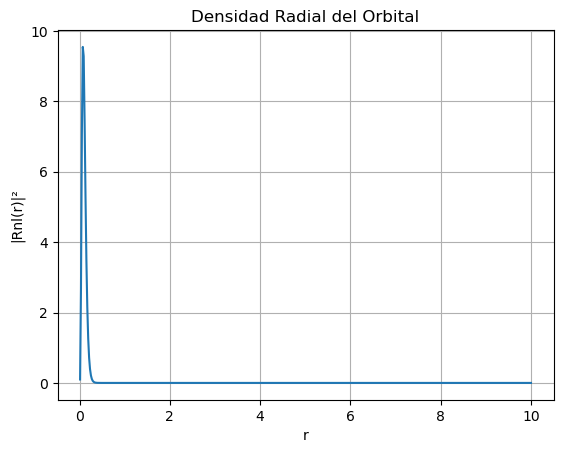

Plotting density for orbital dergerg
m = 0, l = 1


MemoryError: Unable to allocate 977. KiB for an array with shape (50, 50, 50) and data type float64

In [3]:
#constructing the wave function
import wave_function_constructor as wfc
wfc.plot_density(selected_orbital, False, "position")
wfc.plot_density(selected_orbital, True, "position")